Generate ELLC and Claret light curves

In [72]:
#Importing needed libraries
import ellc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ellc.ldy import LimbGravityDarkeningCoeffs, list_bands
%matplotlib notebook   #Makes plots from matplotlib interactive

<IPython.core.display.Javascript object>


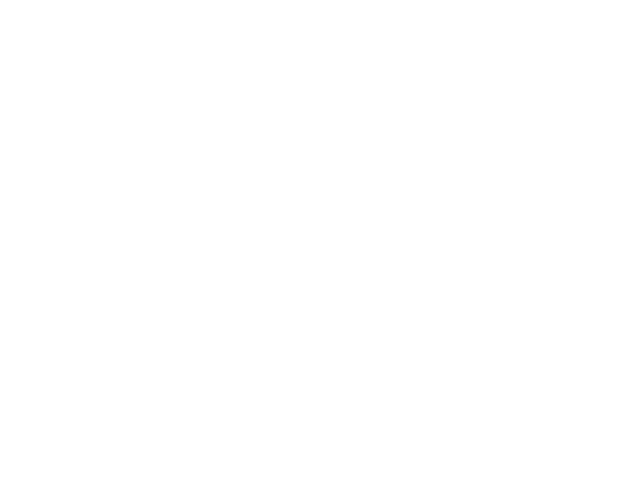

In [10]:
# Example from Maxted code lc.py
t = np.arange(-0.25,0.75, 0.001)
spots_1 = [[30,180],[45,-45],[25,35],[0.2,0.8]]
flux = ellc.lc(t,radius_1=0.1,radius_2=0.05,sbratio=0.2,
incl=89.95,q=0.5,ld_1='quad',ldc_1=[0.65,0.2],ld_2='lin',ldc_2=0.45,
shape_1='poly3p0',shape_2='poly1p5',spots_1=spots_1)
plt.plot(t,flux)
plt.xlabel('Time')
plt.ylabel('Brightness')
plt.show()


In [11]:
#My light curve

# sbratio -surface brightness ratio
# ldc_1/2 - limb-darkening coefficient 1 or 2
# shape_1/2 - shape of either star (maybe try using 'sphere')

t = np.linspace(0,2, 1000)
spots_1 = [[20,160], [-50,50], [20,30], [0,1]]
flux = ellc.lc(t, radius_1 = 0.2, radius_2 = 0.3, sbratio = 0.1, incl = 90, q = 0.5,\
              ld_1 = 'quad', ldc_1 = [0.99,0.8], ld_2 = 'quad', ldc_2 = [0.5,0.5],\
              shape_1 = 'poly3p0', shape_2 = 'poly1p5', spots_1 = spots_1)
plt.plot(t, flux)
plt.xlim(0.25, 1.3)
plt.xlabel('Time')
plt.ylabel('Brightness')
plt.show()

<IPython.core.display.Javascript object>


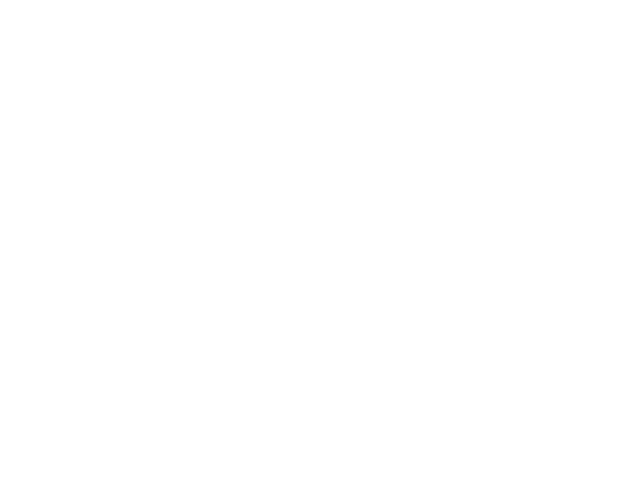

In [12]:
# Spherical star shapes - not much different
t = np.linspace(0,3, 1000)
spots_1 = [[20,160], [-50,50], [20,30], [0,1]]
flux = ellc.lc(t, radius_1 = 0.3, radius_2 = 0.2, sbratio = 0.5, incl = 90, q = 0.5,
               ld_1 = 'claret', ldc_1 = [.6496, -1.0768, 1.8769, -0.4829], 
               ld_2 = 'claret', ldc_2 = [.6496, -1.0768, 1.8769, -0.4829],
               shape_1 = 'sphere', shape_2 = 'sphere')
#                , spots_1 = spots_1, spots_2 = spots_1)
flux2 = ellc.lc(t, radius_1 = 0.3, radius_2 = 0.2, sbratio = 0.5, incl = 90, q = 0.5,
               ld_1 = 'claret', ldc_1 = [.6, -1.4, 1.4, -0.2], 
               ld_2 = 'claret', ldc_2 = [.6, -1.4, 1.4, -0.2],
               shape_1 = 'sphere', shape_2 = 'sphere')
f,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(t, flux, color = 'DarkOrange')
ax1.plot(t, flux2, color = 'DodgerBlue')
ax1.set_xlim(0., 3)
ax1.set_xlabel('Time', fontsize = 16)
ax1.set_ylabel('Brightness', fontsize = 16)
# fractional diff
ax2.plot(t, (flux-flux2)/flux)

In [13]:
# Shape = 'roche'
t = np.linspace(0,2, 1000)
spots_1 = [[20,160], [-50,50], [20,30], [0,1]]
flux = ellc.lc(t, radius_1 = 0.2, radius_2 = 0.3, sbratio = 0.2, incl = 90, q = 0.5,\
              ld_1 = 'quad', ldc_1 = 0.99, ld_2 = 'quad', ldc_2 = 0.5,\
              shape_1 = 'roche', shape_2 = 'sphere', spots_1 = spots_1)
plt.plot(t, flux, color = 'green')
plt.xlim(0.25, 1.3)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Brightness', fontsize = 16)
plt.show()

In [14]:
t = np.linspace(0,2, 1000)
spots_1 = [[20,160], [-50,50], [20,30], [0,1]]
flux = ellc.lc(t, radius_1 = 0.3, radius_2 = 0.4, sbratio = 0.29, incl = 90)
plt.scatter(t, flux, color = 'green')
plt.xlim(0.25, 1.3)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Brightness', fontsize = 16)
plt.show()

In [15]:
# Need to Generate Claret light curves now 
# use LDCs from table file to get fit coefficients
filename = 'tableeq5.dat'
names = ['logg','Teff','Z','xi','a1','a2','a3','a4','Filt','method','model']
dat = pd.read_csv(filename, delim_whitespace=True, header=None, names = names)

In [16]:
M_H = 0

# Effective temp. in Kelvin
T1 = 7000
# log gravity
logg1 = 2.5
# Relative Hydrogen abundance
Z = 0
xi = 2

In [25]:
def get_row(logg, Teff, Z, Filt):
    selected_row = dat[(dat['logg'] == logg) & (dat['Teff'] == Teff) & (dat['xi'] == 2) & (dat['Z'] == Z)&\
                      (dat['Filt'] == Filt) & (dat['model'] == 'ATLAS')]
    a1_value = selected_row['a1'].values[0]
    a2_value = selected_row['a2'].values[0]
    a3_value = selected_row['a3'].values[0]
    a4_value = selected_row['a4'].values[0]
#     print(selected_row)
    return a1_value, a2_value, a3_value, a4_value

In [18]:
tableVals = dict()
tableVals['a1'] = np.array([])
tableVals['a2'] = np.array([])
tableVals['a3'] = np.array([])
tableVals['a4'] = np.array([])

In [19]:
# Trying method from other code:
SDSStable_filters = ['u,','g,','r,','i,','z,', "J", 'H', "K" ]
SDSSwavelength = [354, 464, 621.5, 754.5, 870, 1220, 1630, 2190]
for w,t in zip(SDSSwavelength, SDSStable_filters):
    a1, a2, a3, a4  = get_row(logg1, T1, Z, t)
    tableVals['a1'] = np.append(tableVals['a1'], a1)
    tableVals['a2'] = np.append(tableVals['a2'], a2)
    tableVals['a3'] = np.append(tableVals['a3'], a3)
    tableVals['a4'] = np.append(tableVals['a4'], a4)
print(tableVals['a1'])
print(' ')
print(get_row(2.5, 5000, 0, 'u,'))

        logg    Teff    Z   xi      a1      a2      a3      a4 Filt method  \
180860   2.5  7000.0  0.0  2.0  0.5283  0.2977  0.1038 -0.1142   u,      L   

        model  
180860  ATLAS  
        logg    Teff    Z   xi      a1      a2      a3      a4 Filt method  \
190446   2.5  7000.0  0.0  2.0  0.4723 -0.0251  0.8199 -0.4465   g,      L   

        model  
190446  ATLAS  
        logg    Teff    Z   xi      a1      a2      a3      a4 Filt method  \
200032   2.5  7000.0  0.0  2.0  0.5973  0.0238  0.1798 -0.0842   r,      L   

        model  
200032  ATLAS  
        logg    Teff    Z   xi      a1      a2      a3      a4 Filt method  \
209618   2.5  7000.0  0.0  2.0  0.6058  0.0811 -0.1559  0.0891   i,      L   

        model  
209618  ATLAS  
        logg    Teff    Z   xi     a1      a2      a3      a4 Filt method  \
219204   2.5  7000.0  0.0  2.0  0.628 -0.0691  0.0199 -0.0046   z,      L   

        model  
219204  ATLAS  
        logg    Teff    Z   xi      a1      a2      a3   

In [20]:
# Setting up Limb-Darkening Law for plot
# Claret(2011) - Eq. (5)
a1_value = tableVals['a1']
a2_value = tableVals['a2']
a3_value = tableVals['a3']
a4_value = tableVals['a4']

print(a1_value[0])

# Need to find way to find gamma value - angle between line of sight and emergent intensity
gamma = np.pi/4
mu = np.cos(gamma)

limb_darkening_law = 1 - (a1_value[0]*(1 - np.sqrt(mu)) + (a2_value[0]*(1 - mu)) + (a3_value[0]*(1 - np.sqrt(mu**3)))\
                        + (a4_value[0]*(1 - mu**2)))
print(limb_darkening_law)

0.5283
0.8437711142064138


In [21]:
# Trying to use ellc flux funtion
star_fluxes = ellc.fluxes(t_obs = t, radius_1=0.1,radius_2=0.05,sbratio=0.2,\
incl=89.95,q=0.5,ld_1='quad',ldc_1=[0.65,0.2],ld_2='lin',ldc_2=0.45,\
shape_1='sphere',shape_2='sphere',spots_1=spots_1)
plt.plot(t, star_fluxes)


AttributeError: module 'ellc' has no attribute 'fluxes'

<IPython.core.display.Javascript object>


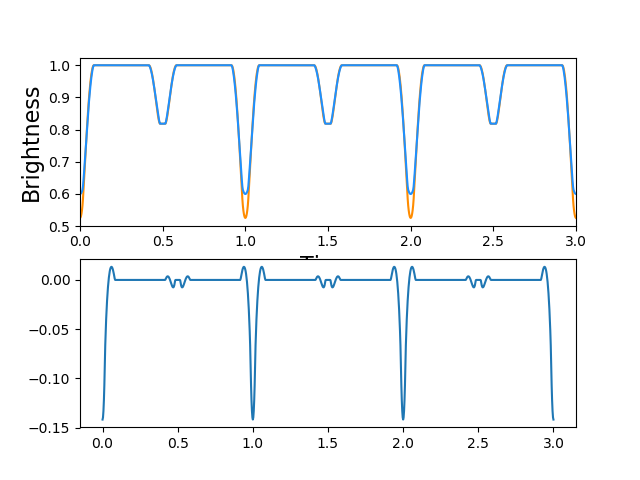

0.14185226870911594


In [102]:
# From meeting with Adam today - DO NOT use this plot (Fake A_n)

# Spherical star shapes - not much different
t = np.linspace(0,3, 1000)
spots_1 = [[20,160], [-50,50], [20,30], [0,1]]
flux = ellc.lc(t, radius_1 = 0.3, radius_2 = 0.2, sbratio = 0.5, incl = 90, q = 0.5,
               ld_1 = 'claret', ldc_1 = [.6496, -1.0768, 1.8769, -0.4829], 
               ld_2 = 'claret', ldc_2 = [.6496, -1.0768, 1.8769, -0.4829],
               shape_1 = 'sphere', shape_2 = 'sphere')

flux2 = ellc.lc(t, radius_1 = 0.3, radius_2 = 0.2, sbratio = 0.5, incl = 90, q = 0.5,
               ld_1 = 'claret', ldc_1 = [.6, -1.4, 1.4, -0.2], 
               ld_2 = 'claret', ldc_2 = [.6, -1.4, 1.4, -0.2],
               shape_1 = 'sphere', shape_2 = 'sphere')
f,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(t, flux, color = 'DarkOrange')
ax1.plot(t, flux2, color = 'DodgerBlue')
ax1.set_xlim(0., 3)
ax1.set_xlabel('Time', fontsize = 16)
ax1.set_ylabel('Brightness', fontsize = 16)
# fractional diff
ax2.plot(t, (flux-flux2)/flux)
d = max(abs((flux-flux2)/flux))
print(d)

In [26]:
print(get_row(4.5, 7500, 0, 'u,'))

(0.6496, -1.0768, 1.8769, -0.4829)


<IPython.core.display.Javascript object>


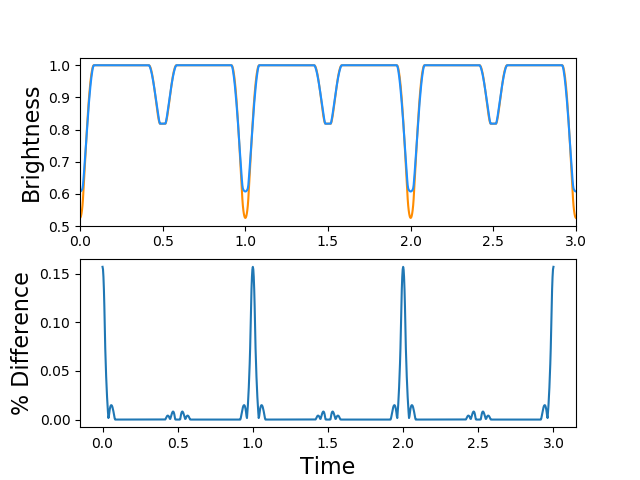

In [122]:
# LC PLOTTING SANDBOX


t = np.linspace(0,3, 1000)
spots_1 = [[20,160], [-50,50], [20,30], [0,1]]
# Set of LDCs #1
flux = ellc.lc(t, radius_1 = 0.3, radius_2 = 0.2, sbratio = 0.5, incl = 90, q = 0.5,
               ld_1 = 'claret', ldc_1 = [.6496, -1.0768, 1.8769, -0.4829], 
               ld_2 = 'claret', ldc_2 = [.6496, -1.0768, 1.8769, -0.4829],
               shape_1 = 'sphere', shape_2 = 'sphere')
#                , spots_1 = spots_1, spots_2 = spots_1)
# Set of LDCs #2

# Turning get_row output into a list

flux2 = ellc.lc(t, radius_1 = 0.3, radius_2 = 0.2, sbratio = 0.5, incl = 90, q = 0.5,
               ld_1 = 'claret', ldc_1 = [0.6167, -0.245, 0.2734, -0.1093], 
               ld_2 = 'claret', ldc_2 = [0.6167, -0.245, 0.2734, -0.1093],
               shape_1 = 'sphere', shape_2 = 'sphere')
f,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(t, flux, color = 'DarkOrange')
ax1.plot(t, flux2, color = 'DodgerBlue')
ax1.set_xlim(0., 3)
ax2.set_xlabel('Time', fontsize = 16)
ax1.set_ylabel('Brightness', fontsize = 16)
ax2.set_ylabel('% Difference', fontsize = 16)
# fractional diff
ax2.plot(t, abs(flux-flux2)/flux)

In [108]:
claret_ldc2 = list(get_row(2.5,7000,0,'u,'))
print(claret_ldc2)

[0.5283, 0.2977, 0.1038, -0.1142]


In [104]:
# Getting ELLC coefficients from grizzly_table_values code

filters = ['u_','g_','r_','i_','z_', "J", 'H', "K" ]   #These filters are formatted how they appear in the csv file
wavelength = [354, 464, 621.5, 754.5, 870, 1220, 1630, 2190]   #Correspond to each of above filters (in order)

filtVals = dict()
filtVals['a1'] = np.array([])
filtVals['a2'] = np.array([])
filtVals['a3'] = np.array([])
filtVals['a4'] = np.array([])

for w,f in zip(wavelength, filters):
    ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
    a1, a2, a3, a4, y = ldy_filt(T1, logg1, M_H)
    filtVals['a1'] = np.append(filtVals['a1'], a1)
    filtVals['a2'] = np.append(filtVals['a2'], a2)
    filtVals['a3'] = np.append(filtVals['a3'], a3)
    filtVals['a4'] = np.append(filtVals['a4'], a4)
    
print(filtVals)

{'a1': array([0.99519998, 0.4429    , 0.60579997, 0.6674    , 0.70639998,
       0.58490904, 0.57873022, 0.51228074]), 'a2': array([-0.99690002,  0.60030001, -0.0371    , -0.40560001, -0.58530003,
       -0.40929609, -0.58854048, -0.53291018]), 'a3': array([ 1.11749995, -0.3427    ,  0.1637    ,  0.47099999,  0.55559999,
        0.33416077,  0.5171779 ,  0.46125665]), 'a4': array([-0.3976    ,  0.0493    , -0.0993    , -0.192     , -0.2078    ,
       -0.1129637 , -0.18044753, -0.15548083])}


In [67]:
# Picking out right values from dictionary - can change index to any filter
# ellcfilter_indexes = {u:0, g:1, r:2, i:3, z:4, y:5, J:5, H:6, K:7} #Indexes for each filter as a reference

a1_ldc = filtVals['a1'][0]
a2_ldc = filtVals['a2'][0]
a3_ldc = filtVals['a3'][0]
a4_ldc = filtVals['a4'][0]
ellc_ldc = [a1_ldc, a2_ldc, a3_ldc, a4_ldc]
print(ellc_ldc)

[0.5845999717712402, 0.11919999867677689, 0.32350000739097595, -0.2061000019311905]


<IPython.core.display.Javascript object>


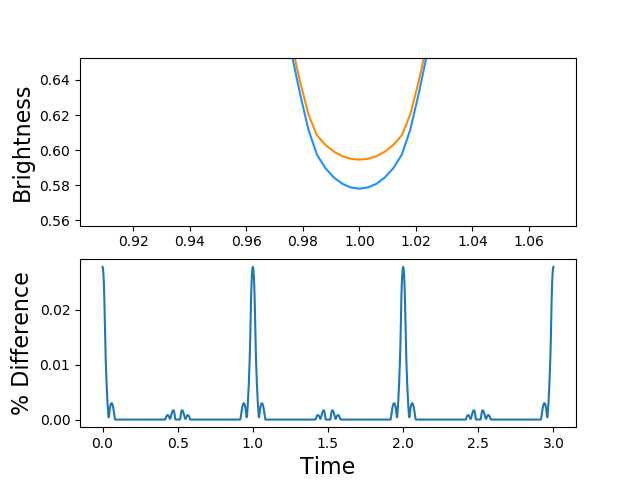

In [123]:
t = np.linspace(0,3, 1000)
spots_1 = [[20,160], [-50,50], [20,30], [0,1]]
# Set of LDCs from ellc
flux = ellc.lc(t, radius_1 = 0.3, radius_2 = 0.2, sbratio = 0.5, incl = 90, q = 0.5,
               ld_1 = 'claret', ldc_1 = ellc_ldc, 
               ld_2 = 'claret', ldc_2 = ellc_ldc,
               shape_1 = 'sphere', shape_2 = 'sphere')
#                spots_1 = spots_1, spots_2 = spots_1)
# Set of LDCs #2

# Turning get_row output into a list
# Plotting with Claret LDCs from get_row function
flux2 = ellc.lc(t, radius_1 = 0.3, radius_2 = 0.2, sbratio = 0.5, incl = 90, q = 0.5,
               ld_1 = 'claret', ldc_1 = claret_ldc2, 
               ld_2 = 'claret', ldc_2 = claret_ldc2,
               shape_1 = 'sphere', shape_2 = 'sphere')
f,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(t, flux, color = 'DarkOrange')
ax1.plot(t, flux2, color = 'DodgerBlue')
ax1.set_xlim(0., 3)
ax2.set_xlabel('Time', fontsize = 16)
ax1.set_ylabel('Brightness', fontsize = 16)
ax2.set_ylabel('% Difference', fontsize = 16)
# fractional diff
ax2.plot(t, abs(flux-flux2)/flux)

Different Stellar Conditions to see similarity

In [88]:
# Trying z filter for shits and gigs

T1 = 9000
logg1 = 4.5


filtVals = dict()
filtVals['a1'] = np.array([])
filtVals['a2'] = np.array([])
filtVals['a3'] = np.array([])
filtVals['a4'] = np.array([])

for w,f in zip(wavelength, filters):
    ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
    a1, a2, a3, a4, y = ldy_filt(T1, logg1, M_H)
    filtVals['a1'] = np.append(filtVals['a1'], a1)
    filtVals['a2'] = np.append(filtVals['a2'], a2)
    filtVals['a3'] = np.append(filtVals['a3'], a3)
    filtVals['a4'] = np.append(filtVals['a4'], a4)
    


a1_ldc = filtVals['a1'][4]
a2_ldc = filtVals['a2'][4]
a3_ldc = filtVals['a3'][4]
a4_ldc = filtVals['a4'][4]
ellc_ldc2 = [a1_ldc, a2_ldc, a3_ldc, a4_ldc]
print(ellc_ldc2)

[0.7063999772071838, -0.5853000283241272, 0.5555999875068665, -0.2078000009059906]


In [89]:
claret_ldc = list(get_row(4.5,9000,0,'z,'))
print(claret_ldc)

[0.6701, -0.4699, 0.4132, -0.148]


<IPython.core.display.Javascript object>


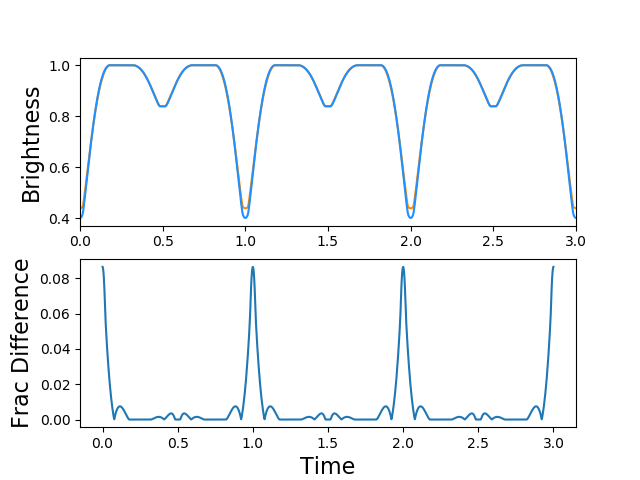

0.08657509994316048


In [128]:
t = np.linspace(0,3, 1000)
spots_1 = [[20,160], [-50,50], [20,30], [0,1]]
# Set of LDCs from ellc
flux = ellc.lc(t, radius_1 = 0.5, radius_2 = 0.4, sbratio = 0.3, incl = 90, q = 0.5,
               ld_1 = 'claret', ldc_1 = ellc_ldc2, 
               ld_2 = 'claret', ldc_2 = ellc_ldc2,
               shape_1 = 'sphere', shape_2 = 'sphere')
#                spots_1 = spots_1, spots_2 = spots_1)
# Set of LDCs #2

# Turning get_row output into a list
# Plotting with Claret LDCs from get_row function
flux2 = ellc.lc(t, radius_1 = 0.5, radius_2 = 0.4, sbratio = 0.3, incl = 90, q = 0.5,
               ld_1 = 'claret', ldc_1 = claret_ldc, 
               ld_2 = 'claret', ldc_2 = claret_ldc,
               shape_1 = 'sphere', shape_2 = 'sphere')
f,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(t, flux, color = 'DarkOrange')
ax1.plot(t, flux2, color = 'DodgerBlue')
ax1.set_xlim(0., 3)
ax2.set_xlabel('Time', fontsize = 16)
ax1.set_ylabel('Brightness', fontsize = 16)
ax2.set_ylabel('Frac Difference', fontsize = 16)
# fractional diff
ax2.plot(t, abs(flux-flux2)/flux)
d = max(abs((flux-flux2)/flux))
print(d)

In [124]:
T1 = 4500
logg1 = 3.5


filtVals = dict()
filtVals['a1'] = np.array([])
filtVals['a2'] = np.array([])
filtVals['a3'] = np.array([])
filtVals['a4'] = np.array([])

for w,f in zip(wavelength, filters):
    ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
    a1, a2, a3, a4, y = ldy_filt(T1, logg1, M_H)
    filtVals['a1'] = np.append(filtVals['a1'], a1)
    filtVals['a2'] = np.append(filtVals['a2'], a2)
    filtVals['a3'] = np.append(filtVals['a3'], a3)
    filtVals['a4'] = np.append(filtVals['a4'], a4)
    


a1_ldc = filtVals['a1'][3]
a2_ldc = filtVals['a2'][3]
a3_ldc = filtVals['a3'][3]
a4_ldc = filtVals['a4'][3]
ellc_ldc3 = [a1_ldc, a2_ldc, a3_ldc, a4_ldc]
print(ellc_ldc2)

[0.7063999772071838, -0.5853000283241272, 0.5555999875068665, -0.2078000009059906]


In [125]:
claret_ldc = list(get_row(3.5,4500,0,'i,'))
print(claret_ldc)

[0.8322, -0.9277, 1.4302, -0.5438]


<IPython.core.display.Javascript object>


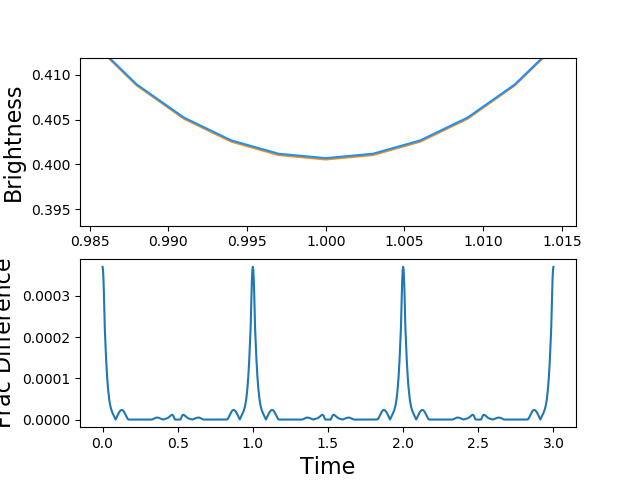

0.0003706418380275779


In [127]:
# 3rd set of stellar conditions


t = np.linspace(0,3, 1000)
spots_1 = [[20,160], [-50,50], [20,30], [0,1]]
# Set of LDCs from ellc
flux = ellc.lc(t, radius_1 = 0.5, radius_2 = 0.4, sbratio = 0.3, incl = 90, q = 0.5,
               ld_1 = 'claret', ldc_1 = ellc_ldc3, 
               ld_2 = 'claret', ldc_2 = ellc_ldc3,
               shape_1 = 'sphere', shape_2 = 'sphere')
#                spots_1 = spots_1, spots_2 = spots_1)
# Set of LDCs #2

# Turning get_row output into a list
# Plotting with Claret LDCs from get_row function
flux2 = ellc.lc(t, radius_1 = 0.5, radius_2 = 0.4, sbratio = 0.3, incl = 90, q = 0.5,
               ld_1 = 'claret', ldc_1 = claret_ldc, 
               ld_2 = 'claret', ldc_2 = claret_ldc,
               shape_1 = 'sphere', shape_2 = 'sphere')
f,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(t, flux, color = 'DarkOrange')
ax1.plot(t, flux2, color = 'DodgerBlue')
ax1.set_xlim(0., 3)
ax2.set_xlabel('Time', fontsize = 16)
ax1.set_ylabel('Brightness', fontsize = 16)
ax2.set_ylabel('Frac Difference', fontsize = 16)
# fractional diff
ax2.plot(t, abs(flux-flux2)/flux)
d = max(abs((flux-flux2)/flux))
print(d)